# Analisis exploratorio de datos

In [1]:
import pandas as pd
import datetime as dt
import time as t
from pycoingecko import CoinGeckoAPI
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cg = CoinGeckoAPI()
cg.ping()

{'gecko_says': '(V3) To the Moon!'}

### Diferente información sobre las Monedas
El siguiente dataframe lista las monedas ordenadas por capitalización de mercado y muestan algunas caracteristicas, algunas son explicadas aqui abajo. Para mas informacion referirse aqui:

https://www.coingecko.com/en/glossary

In [3]:
coin_markets = cg.get_coins_markets(vs_currency='usd', per_page=250)
coin_markets = pd.DataFrame(coin_markets)

In [4]:
#coin_markets.info()

Transcripcion de pagina de coigecko, glosario.

**market_cap**: In Crypto, market cap is measured by multiplication of the circulating supply of tokens or currency and its current price
**fully_diluted_valuation**: Fully Diluted Valuation (FDV) is the market capitalization if the max supply of a coin is in circulation. The common mathematical formula used to calculate FDV is Current Price x Max Supply. Note that it can take 3, 5, 10 or more years before the FDV can be reached, depending on how the emission schedule is designed.

**total_volume** : The amount of the cryptocurrency that has been traded in the last 24 hours.

**circulating_supply**: An approximation of the number of coins or tokens that are currently not locked and available for public transactions.

**ath**:_ Precio de cripto desde el máximo histórico (ATH)

**atl**: The lowest point (in price, in market capitalization) that a cryptocurrency has been in history.

**roi**: Short for “Return on Investment”, the ratio between the net profit and cost of investing.
An approximation of the number of coins or tokens that are currently not locked and available for public transactions.


In [5]:
tot_market_cap = coin_markets['market_cap'].sum()


In [6]:
coin_markets.insert(loc=6, column='percentage_of_total', value=2)

In [7]:
coin_markets['percentage_of_total'] = coin_markets['market_cap']/tot_market_cap*100


In [8]:
coin_markets.insert(loc=7, column='cumsum_Percentage_MC', value=coin_markets['percentage_of_total'].cumsum())


In [96]:
coinmarkets = coin_markets.iloc[0:20,:]

In [10]:
ListaMonedas = pd.DataFrame(cg.get_coins_list())
ListaMonedas

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0vix-protocol,vix,0VIX Protocol
3,0x,zrx,0x Protocol
4,0x0-ai-ai-smart-contract,0x0,0x0.ai: AI Smart Contract
...,...,...,...
10060,zynecoin,zyn,Zynecoin
10061,zynergy,zyn,Zynergy
10062,zyrri,zyr,Zyrri
10063,zyx,zyx,ZYX


#### **Conclusion 1**:

De las 10055 monedas, solo bitcoin tiene el 48.2 % del total del marketcap, y entre las primeras 5 monedas está el 80 % del total.



## Clasificacion por Categorias:

En los siguientes DataFrames, pueden verse un listado filtrado por categorias, en el primer caso se trata de categoria layer-1 y en el segundo de stablecoin.



In [11]:
categories = pd.DataFrame(cg.get_coins_markets(vs_currency = 'usd', category = 'layer-1', order = 'market_cap_desc'))
categories.iloc[0:10,:]

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29138.000000,5.671856e+11,1.0,6.121071e+11,9.179801e+09,29409.000000,...,2.100000e+07,2.100000e+07,69045.000000,-57.78159,2021-11-10T14:24:11.849Z,67.810000,42887.81472,2013-07-06T00:00:00.000Z,None,2023-08-16T06:59:04.167Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1822.220000,2.189871e+11,2.0,2.189871e+11,4.780452e+09,1842.870000,...,1.201391e+08,NaN,4878.260000,-62.63628,2021-11-10T14:24:19.604Z,0.432979,420867.29186,2015-10-20T00:00:00.000Z,"{'times': 82.61331216417604, 'currency': 'btc'...",2023-08-16T06:59:08.531Z
2,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,234.340000,3.608664e+10,4.0,4.690958e+10,4.780305e+08,239.580000,...,1.538562e+08,2.000000e+08,686.310000,-65.80499,2021-05-10T07:24:17.097Z,0.039818,589292.68617,2017-10-19T00:00:00.000Z,None,2023-08-16T06:59:02.417Z
3,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.278425,9.760741e+09,9.0,1.253340e+10,1.903511e+08,0.290157,...,4.500000e+10,4.500000e+10,3.090000,-90.96188,2021-09-02T06:00:10.474Z,0.019253,1349.13791,2020-03-13T02:22:55.044Z,None,2023-08-16T06:59:03.104Z
4,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,23.450000,9.513369e+09,10.0,1.299858e+10,4.650227e+08,25.010000,...,5.551117e+08,NaN,259.960000,-90.97102,2021-11-06T21:54:35.825Z,0.500801,4586.82155,2020-05-11T19:35:23.449Z,None,2023-08-16T06:59:07.157Z
5,polkadot,dot,Polkadot,https://assets.coingecko.com/coins/images/1217...,4.790000,6.053355e+09,12.0,6.440783e+09,1.104934e+08,4.980000,...,1.345735e+09,NaN,54.980000,-91.29619,2021-11-04T14:10:09.301Z,2.700000,77.40546,2020-08-20T05:48:11.359Z,None,2023-08-16T06:59:02.560Z
6,bitcoin-cash,bch,Bitcoin Cash,https://assets.coingecko.com/coins/images/780/...,225.870000,4.397431e+09,19.0,4.741148e+09,3.013230e+08,236.880000,...,2.100000e+07,2.100000e+07,3785.820000,-94.03073,2017-12-20T00:00:00.000Z,76.930000,193.73661,2018-12-16T00:00:00.000Z,None,2023-08-16T06:59:03.092Z
7,avalanche-2,avax,Avalanche,https://assets.coingecko.com/coins/images/1255...,11.690000,4.023187e+09,20.0,8.423216e+09,1.292121e+08,12.320000,...,4.306136e+08,7.200000e+08,144.960000,-91.91354,2021-11-21T14:18:56.538Z,2.800000,318.49184,2020-12-31T13:15:21.540Z,None,2023-08-16T06:59:07.455Z
8,cosmos,atom,Cosmos Hub,https://assets.coingecko.com/coins/images/1481...,7.990000,2.337322e+09,30.0,NaN,1.226745e+08,8.510000,...,NaN,NaN,44.450000,-82.00466,2022-01-17T00:34:41.497Z,1.160000,589.49725,2020-03-13T02:27:44.591Z,"{'times': 78.87188908024065, 'currency': 'usd'...",2023-08-16T06:59:06.582Z
9,hedera-hashgraph,hbar,Hedera,https://assets.coingecko.com/coins/images/3688...,0.062018,2.042150e+09,31.0,3.097824e+09,2.746392e+08,0.073669,...,5.000000e+10,5.000000e+10,0.569229,-89.00823,2021-09-15T10:40:28.318Z,0.009861,534.49567,2020-01-02T17:30:24.852Z,None,2023-08-16T06:59:06.541Z


#### **Conclusion 2**
En el top 5 de arriba, solo figura una sola moneda del tipo "stablecoin": tether, que se encuentra en el puesto 3. En el puesto 6 figura la segunda, usd-coin.

In [12]:
categories = pd.DataFrame(cg.get_coins_markets(vs_currency = 'usd', category = 'stablecoins', order = 'market_cap_desc'))
categories.iloc[0:50,:]

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.998683,8.309070e+10,3.0,8.309070e+10,2.087971e+10,1.001000,...,8.318200e+10,NaN,1.320000,-24.49886,2018-07-24T00:00:00.000Z,0.572521,74.48305,2015-03-02T00:00:00.000Z,None,2023-08-16T06:55:00.431Z
1,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,0.999691,2.603343e+10,6.0,2.603343e+10,2.918715e+09,1.002000,...,2.603383e+10,NaN,1.170000,-14.70688,2019-05-08T00:40:28.300Z,0.877647,13.96815,2023-03-11T08:02:13.981Z,None,2023-08-16T06:59:11.036Z
2,dai,dai,Dai,https://assets.coingecko.com/coins/images/9956...,0.999784,3.929121e+09,21.0,3.929085e+09,6.408415e+07,1.002000,...,3.928935e+09,NaN,1.220000,-17.93913,2020-03-13T03:02:50.373Z,0.881960,13.41389,2023-03-11T07:50:50.514Z,None,2023-08-16T06:55:00.244Z
3,binance-usd,busd,Binance USD,https://assets.coingecko.com/coins/images/9576...,0.999446,3.336982e+09,25.0,3.336982e+09,1.806561e+09,1.001000,...,3.337600e+09,NaN,1.150000,-13.34114,2020-03-13T02:35:42.953Z,0.901127,10.99654,2021-05-19T13:04:37.445Z,None,2023-08-16T06:59:05.032Z
4,true-usd,tusd,TrueUSD,https://assets.coingecko.com/coins/images/3449...,0.999436,2.751250e+09,28.0,2.751248e+09,2.089895e+09,1.001000,...,2.751974e+09,NaN,1.620000,-38.24136,2018-08-26T20:41:09.375Z,0.883550,13.13131,2020-03-12T10:47:51.380Z,None,2023-08-16T06:59:06.555Z
5,frax,frax,Frax,https://assets.coingecko.com/coins/images/1342...,0.997483,8.108081e+08,50.0,8.108081e+08,9.616606e+06,0.999208,...,8.126414e+08,NaN,1.140000,-12.51403,2021-02-07T12:55:35.766Z,0.874536,14.08728,2023-03-11T07:50:39.316Z,None,2023-08-16T06:59:07.150Z
6,usdd,usdd,USDD,https://assets.coingecko.com/coins/images/2538...,0.995866,7.226880e+08,57.0,NaN,2.672259e+07,0.999007,...,NaN,NaN,1.044000,-4.54479,2022-11-09T09:56:06.131Z,0.928067,7.37027,2022-06-19T16:15:11.558Z,None,2023-08-16T06:59:05.165Z
7,paxos-standard,usdp,Pax Dollar,https://assets.coingecko.com/coins/images/6013...,0.997879,5.058226e+08,81.0,5.058226e+08,2.341628e+06,1.001000,...,5.061000e+08,NaN,1.130000,-11.34588,2018-10-15T07:09:12.459Z,0.863529,15.77262,2021-05-19T13:14:42.046Z,"{'times': -0.0021213225141038, 'currency': 'us...",2023-08-16T06:59:12.182Z
8,pax-gold,paxg,PAX Gold,https://assets.coingecko.com/coins/images/9519...,1900.600000,4.722590e+08,87.0,4.722590e+08,7.639255e+06,1908.940000,...,2.483434e+05,NaN,2241.370000,-15.18994,2021-05-17T19:02:29.657Z,1399.640000,35.81382,2019-11-18T03:09:35.959Z,None,2023-08-16T06:59:03.274Z
9,tether-gold,xaut,Tether Gold,https://assets.coingecko.com/coins/images/1048...,1904.570000,4.697009e+08,89.0,4.697009e+08,2.602342e+06,1911.320000,...,2.465243e+05,NaN,2169.740000,-12.14309,2023-03-15T20:36:21.941Z,1447.840000,31.66272,2020-03-19T13:45:41.821Z,None,2023-08-16T06:59:08.855Z


## Eleccion de las monedas:

Entendiendo que las monedas mas valoradas son las que tienen mayor capitalizacion de mercado, el primer criterio para la elección sera la capitalizacion de mercado. Por otro lado, como se haran comparaciones entre las monedas, es importante distinguir las monedas estables de las que tienen mayor variacion. Por ello, se eligen 5 monedas de la categoria Layer-1 y 5 monedas del tipo StableCoin.

Las 4 primeras monedas de Layer-1 son elegidas por capitalizacion de mercado, la quinta; Dogecoin es elegida dado que mediante sucesivos Tweets, Elon Musk la recomendaba y la des recomendaba de manera frecuente. Es por ello que el driver para su movimiento de precio es en esos casos distinto a las otras monedas que generalmente su variacion de precio esta relacionada al Bitcoin. Para estudiar estas relaciones, se elige Doge por fuera del criterio de la capitalizacion de mercado.

Por el lado de las stable-coin, las 3 primeras elegidas (Tether, Usd-coin, Dai) estan en orden de capitalización de mercado, pero tambien es importante destacar que tanto Tether como Usd-coin estan respaldadas en dolares. En tanto que Dai es una moneda que no tiene respaldo en dolares fisicos, sino que su precio esta controlado por distintos algoritmos que emiten o queman monedas para mantener el precio. Por ultimo, las otras dos monedas restantes son respaldadas en oro. Esta diversidad en fundamentos, alienta la búsqueda de información valiosa desde los datos.

En la siguiente lista se pueden ver las monedas elegidas para el analisis.

In [13]:
CoinList = ['bitcoin', 
            'ethereum',
            'binancecoin',
            'solana',
            'dogecoin',
            'tether',
            'usd-coin',
            'dai',
            'pax-gold',
            'tether-gold']

In [14]:
def date_price_market_caps_volume(coin):
    # Esta funcion utiliza el get de coingecko para tomar el precio, market_cap, total_volumes. Se cambian Nans por el valor al siguiente muestra. 
    # Luego se realizan algunas transformaciones, se agregan columnas de caracteristicas normalizadas como precio , marketcap, y volumen, todas ellas 
    # respecto al maximo y se expresan en %.
    # Estos dataframes tendran una granularidad diaria.
    
    
    bcoin = cg.get_coin_market_chart_by_id(id= coin, vs_currency = 'usd', days = 'max')
    bcoin_price = pd.DataFrame(data = bcoin['prices'], columns = ['Date', 'Price'])
    bcoin_price_market_caps = pd.DataFrame(data = bcoin['market_caps'], columns = ['Date', 'market_caps'])
    bcoin_price_total_volumes = pd.DataFrame(data = bcoin['total_volumes'], columns = ['Date', 'total_volumes'])
    dfn = bcoin_price.merge(bcoin_price_market_caps, how= 'left',on = 'Date').merge(bcoin_price_total_volumes, how= 'left',on = 'Date')
    dfn['Date']= dfn['Date'].apply(lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))
    
    dfn['market_caps'].fillna(method="ffill", inplace = True)           #se corroboró mas adelante que solo algunas monedas tienen valores Nan, y las que lo
                                                                        #tienen, lo tienen en 'market_cap'    
    max = dfn['Price'].max()
    dfn.insert(loc = 2, column = 'Normalized_Price', value=dfn['Price']/max*100)
    dfn.insert(loc = 4, column = 'n_coins' , value=dfn['market_caps']/dfn['Price'])
    
    maxMC = dfn['market_caps'].max()
    maxvol = dfn['total_volumes'].max()
    
    dfn.insert(loc = 4, column = 'market_caps_normalized' , value= dfn['market_caps']/ maxMC *100)
    dfn.insert(loc = 7, column = 'Volume_normalized', value= dfn['total_volumes'] / maxvol*100)


    return dfn

In [15]:
#se generan 10 dataframes, cada uno para cada moneda.
bitcoinperday = date_price_market_caps_volume(CoinList[0])
ethereumperday = date_price_market_caps_volume(CoinList[1])
binancecoinperday = date_price_market_caps_volume(CoinList[2])
solanaperday = date_price_market_caps_volume(CoinList[3])
dogecoinperday = date_price_market_caps_volume(CoinList[4])
tetherperday = date_price_market_caps_volume(CoinList[5])
usd_coinperday = date_price_market_caps_volume(CoinList[6])
daiperday = date_price_market_caps_volume(CoinList[7])
pax_goldperday = date_price_market_caps_volume(CoinList[8])
tether_goldperday = date_price_market_caps_volume(CoinList[9])


In [16]:
def dicc_nomb(df, coin):
    # esta funcion retorna un diccionario con las keys de los nombres originales de los dataframes y los values de los nuevos nombres. Estos ultimos 
    # dependen del parametro coin. Este diccionario será utilizado para cambiar el nombre de las columnas
    
    lista_col = []
    for col in df:
        lista_col.append(col)
    n = len(lista_col)
    
    lista_col_camb = []
    lista_col_camb.append(lista_col[0])
    for i in range (1,n):
    #, j in enumerate(lista_col, start=1):
        lista_col_camb.append(lista_col[i] + '_'+ coin)
    
    
    dicc = dict(zip(lista_col, lista_col_camb))
    
    

    return dicc
    

In [17]:
# Se cambian los nombres de las columnas
bitcoinperday = bitcoinperday.rename(columns=dicc_nomb(bitcoinperday, CoinList[0]))
ethereumperday = ethereumperday.rename(columns=dicc_nomb(ethereumperday, CoinList[1]))
binancecoinperday = binancecoinperday.rename(columns=dicc_nomb(binancecoinperday, CoinList[2]))
solanaperday = solanaperday.rename(columns=dicc_nomb(solanaperday, CoinList[3]))
dogecoinperday = dogecoinperday.rename(columns=dicc_nomb(dogecoinperday, CoinList[4]))



tetherperday = tetherperday.rename(columns=dicc_nomb(tetherperday, CoinList[5]))
usd_coinperday = usd_coinperday.rename(columns=dicc_nomb(usd_coinperday, CoinList[6]))
daiperday = daiperday.rename(columns=dicc_nomb(daiperday, CoinList[7]))
pax_goldperday = pax_goldperday.rename(columns=dicc_nomb(pax_goldperday, CoinList[8]))
tether_goldperday = tether_goldperday.rename(columns=dicc_nomb(tether_goldperday, CoinList[9]))


In [18]:
tetherperday = tetherperday.iloc[2:,:]          # se sacan los primeros valores que son erroneos

In [19]:
#Se hace merge con las 5 monedas Layer-1
layer_1 = bitcoinperday.merge(ethereumperday, how= 'left',  on = 'Date').merge(binancecoinperday, how= 'left',  on = 'Date').merge(solanaperday, how= 'left',  on = 'Date').merge(dogecoinperday, how= 'left',  on = 'Date')



In [20]:
# se hace merge con las 5 monedas stablecoin
stablecoins = tetherperday.merge(usd_coinperday, how= 'left',  on = 'Date').merge(daiperday, how= 'left',  on = 'Date').merge(pax_goldperday, how= 'left',  on = 'Date').merge(tether_goldperday, how= 'left',  on = 'Date')



In [85]:
def OHLC(coin):
    # Esta funcion genera un dataframe con los datos de: precio de apertura, precio de cierre, maximo minimo del intevalo de tiempo. El intervalo de tiempo es 4 
    # dias. Ademas se crean otras dos columnas, variacion entre apertura y cierre respecto a la apertura, y variacion entre max y min respecto a la media del inter
    # valo en %.
    # Se ha comprobado que no requiere que se realicen eliminacion de nulos o Nans.

    ohlc = cg.get_coin_ohlc_by_id(id = coin, 
                                vs_currency = 'usd', 
                                days = 'max', columns = ['Date', 'Open', 'High' ,'Low', 'Close'])
    ohlc = pd.DataFrame(data = ohlc,
                           columns = ['Date', 'Open', 'High' ,'Low', 'Close'])

    ohlc['Date'] = ohlc['Date'].apply(
                        lambda x: dt.datetime.fromtimestamp(x/1000
                        ).strftime('%m-%d-%Y'))

    ohlc.insert(loc=5, column= 'O_C_variation_Normalized', value= (ohlc['Open']-ohlc['Close'])/ohlc['Open']*100)           #Variacion respecto apertura / cierre.
    ohlc.insert(loc=6, column= 'Max_Variation_Normalized', value= (ohlc['High']-ohlc['Low'])/((ohlc['Open']))*100)            #Variacion respecto max / min.

    return ohlc

In [86]:
# Se generan los dataframes con la funcion anterior.


bitcoinohlc = OHLC(CoinList[0])
ethereumohlc = OHLC(CoinList[1])
binancecoinohlc = OHLC(CoinList[2])
solanaohlc = OHLC(CoinList[3])
dogecoinohlc = OHLC(CoinList[4])



tetherohlc = OHLC(CoinList[5])
usd_coinohlc = OHLC(CoinList[6])
daiohlc = OHLC(CoinList[7])
pax_goldohlc = OHLC(CoinList[8])
tether_goldohlc = OHLC(CoinList[9])



In [87]:
# Se cambian los nombres de las columnas.


bitcoinohlc = bitcoinohlc.rename(columns=dicc_nomb(bitcoinohlc, CoinList[0]))
ethereumohlc = ethereumohlc.rename(columns=dicc_nomb(ethereumohlc, CoinList[1]))
binancecoinohlc = binancecoinohlc.rename(columns=dicc_nomb(binancecoinohlc, CoinList[2]))
solanaohlc = solanaohlc.rename(columns=dicc_nomb(solanaohlc, CoinList[3]))
dogecoinohlc = dogecoinohlc.rename(columns=dicc_nomb(dogecoinohlc, CoinList[4]))


tetherohlc = tetherohlc.rename(columns=dicc_nomb(tetherohlc, CoinList[5]))
usd_coinohlc = usd_coinohlc.rename(columns=dicc_nomb(usd_coinohlc, CoinList[6]))
daiohlc = daiohlc.rename(columns=dicc_nomb(daiohlc, CoinList[7]))
pax_goldohlc = pax_goldohlc.rename(columns=dicc_nomb(pax_goldohlc, CoinList[8]))
tether_goldohlc = tether_goldohlc.rename(columns=dicc_nomb(tether_goldohlc, CoinList[9]))





In [88]:
tetherohlc = tetherohlc.iloc[2:,:]          # se sacan los primeros valores que son erroneos

In [89]:
#Se hace merge con las 5 monedas Layer-1

layer_1_ohlc = bitcoinohlc.merge(ethereumohlc, how='left',  on='Date').merge(binancecoinohlc, how ='left',  on ='Date').merge(solanaohlc, how ='left',  on ='Date').merge(dogecoinohlc, how= 'left',  on = 'Date')



In [26]:
#layer_1ohlc.info()

In [90]:
#Se hace merge con las 5 monedas stablecoin,

stablecoins_ohlc = tetherohlc.merge(usd_coinohlc, how ='left',  on ='Date').merge(daiohlc, how='left',  on ='Date').merge(pax_goldohlc, how ='left',  on ='Date').merge(tether_goldohlc, how= 'left',  on = 'Date')



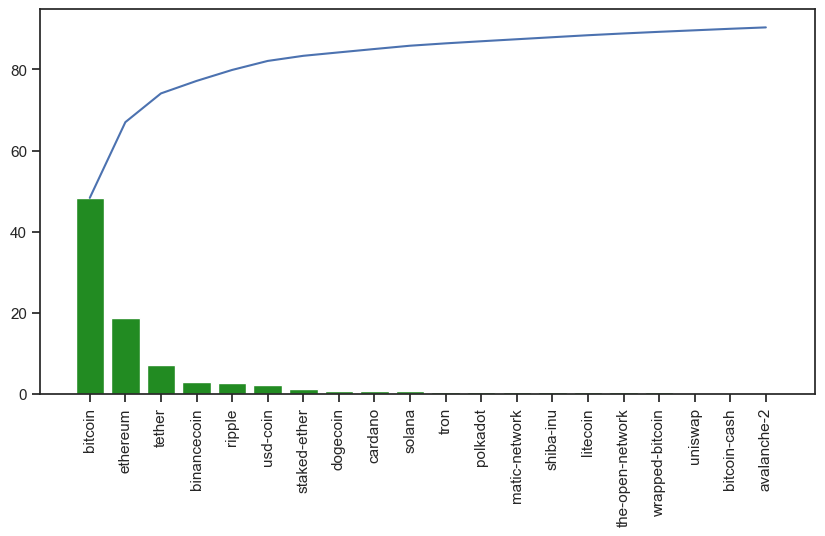

In [92]:
plt.figure(figsize=[10,5])

plt.plot(coinmarkets['id'], coinmarkets['cumsum_Percentage_MC'], color= 'b', label= 'cumsum')
plt.xticks(rotation=90)
#plt. legend()
plt.ylabel = "% Market Cap"
plt.bar(coinmarkets['id'], coinmarkets['percentage_of_total'], color= 'forestgreen')
plt.show()


In [30]:
layer_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                3762 non-null   object 
 1   Price_bitcoin                       3762 non-null   float64
 2   Normalized_Price_bitcoin            3762 non-null   float64
 3   market_caps_bitcoin                 3762 non-null   float64
 4   market_caps_normalized_bitcoin      3762 non-null   float64
 5   n_coins_bitcoin                     3762 non-null   float64
 6   total_volumes_bitcoin               3762 non-null   float64
 7   Volume_normalized_bitcoin           3762 non-null   float64
 8   Price_ethereum                      2932 non-null   float64
 9   Normalized_Price_ethereum           2932 non-null   float64
 10  market_caps_ethereum                2932 non-null   float64
 11  market_caps_normalized_ethereum     2932 no

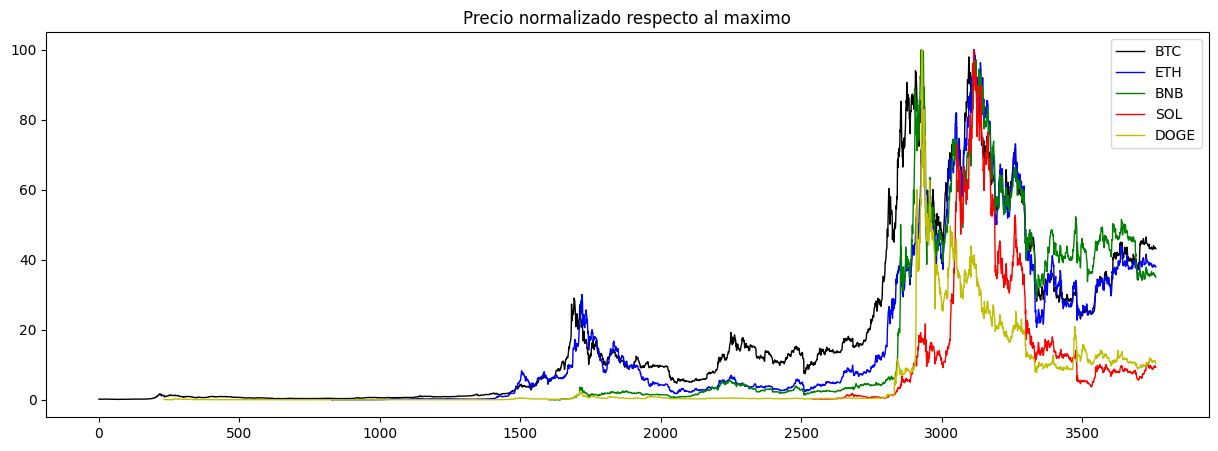

In [31]:

plt.figure(figsize=[15,5])


plt.title('Precio normalizado respecto al maximo')
plt.plot(layer_1['Normalized_Price_bitcoin'], label= 'BTC', linewidth=1, color= 'k')
plt.plot(layer_1['Normalized_Price_ethereum'], label='ETH', linewidth=1, color= 'b')
plt.plot(layer_1['Normalized_Price_binancecoin'], label= 'BNB', linewidth=1, color= 'g')
plt.plot(layer_1['Normalized_Price_solana'], label= 'SOL', linewidth=1, color= 'r')
plt.plot(layer_1['Normalized_Price_dogecoin'], label= 'DOGE', linewidth=1, color= 'y')
plt.legend()

#fig, axs=plt.subplots(1,5,figsize=(10,10))
#axs[0,1].plot

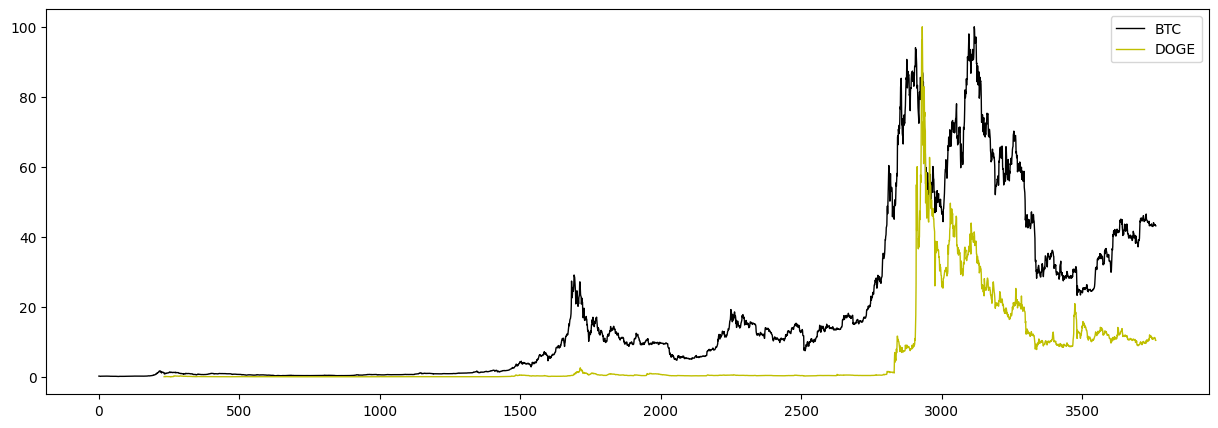

In [32]:
plt.figure(figsize=[15,5])
#fig = plt.figure()
#ax = plt.axes()



plt.plot(layer_1['Normalized_Price_bitcoin'], label= 'BTC', linewidth=1, color= 'k')
#plt.plot(layer_1['Normalized_Price_ethereum'], label='ETH', linewidth=1, color= 'b')
#plt.plot(layer_1['Normalized_Price_binancecoin'], label= 'BNB', linewidth=1, color= 'g')
#plt.plot(layer_1['Normalized_Price_solana'], label= 'SOL', linewidth=1, color= 'r')
plt.plot(layer_1['Normalized_Price_dogecoin'], label= 'DOGE', linewidth=1, color= 'y')
plt.legend()
plt.legend()

In [33]:
l1price= layer_1[['Normalized_Price_bitcoin', 'Normalized_Price_ethereum', 'Normalized_Price_binancecoin', 'Normalized_Price_solana', 'Normalized_Price_dogecoin']]


In [34]:
l1price.dropna(inplace=True)
l1price

C:\Users\Nahuel Elias\AppData\Local\Temp\ipykernel_22484\3377614898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l1price.dropna(inplace=True)


,Normalized_Price_bitcoin,Normalized_Price_ethereum,Normalized_Price_binancecoin,Normalized_Price_solana,Normalized_Price_dogecoin
2538,10.152318,3.276013,2.032121,0.369390,0.286771
2539,10.173151,3.288219,2.048108,0.302697,0.292523
2540,10.223993,3.299349,2.113041,0.337909,0.289742
2541,10.141735,3.254438,2.228647,0.303469,0.287391
2542,10.145639,3.286957,2.308213,0.257165,0.288449
...,...,...,...,...,...
3757,43.498137,38.390518,35.563444,9.601860,11.248412
3758,43.310060,38.203760,35.554904,9.343981,10.967026
3759,43.481048,38.286846,35.603380,9.700574,10.965060
3760,43.132436,37.942085,35.047792,9.287623,10.386303


c:\Users\Nahuel Elias\Documents\Hernry\PI2\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Matriz de graficos de dispersión precios normalizados')

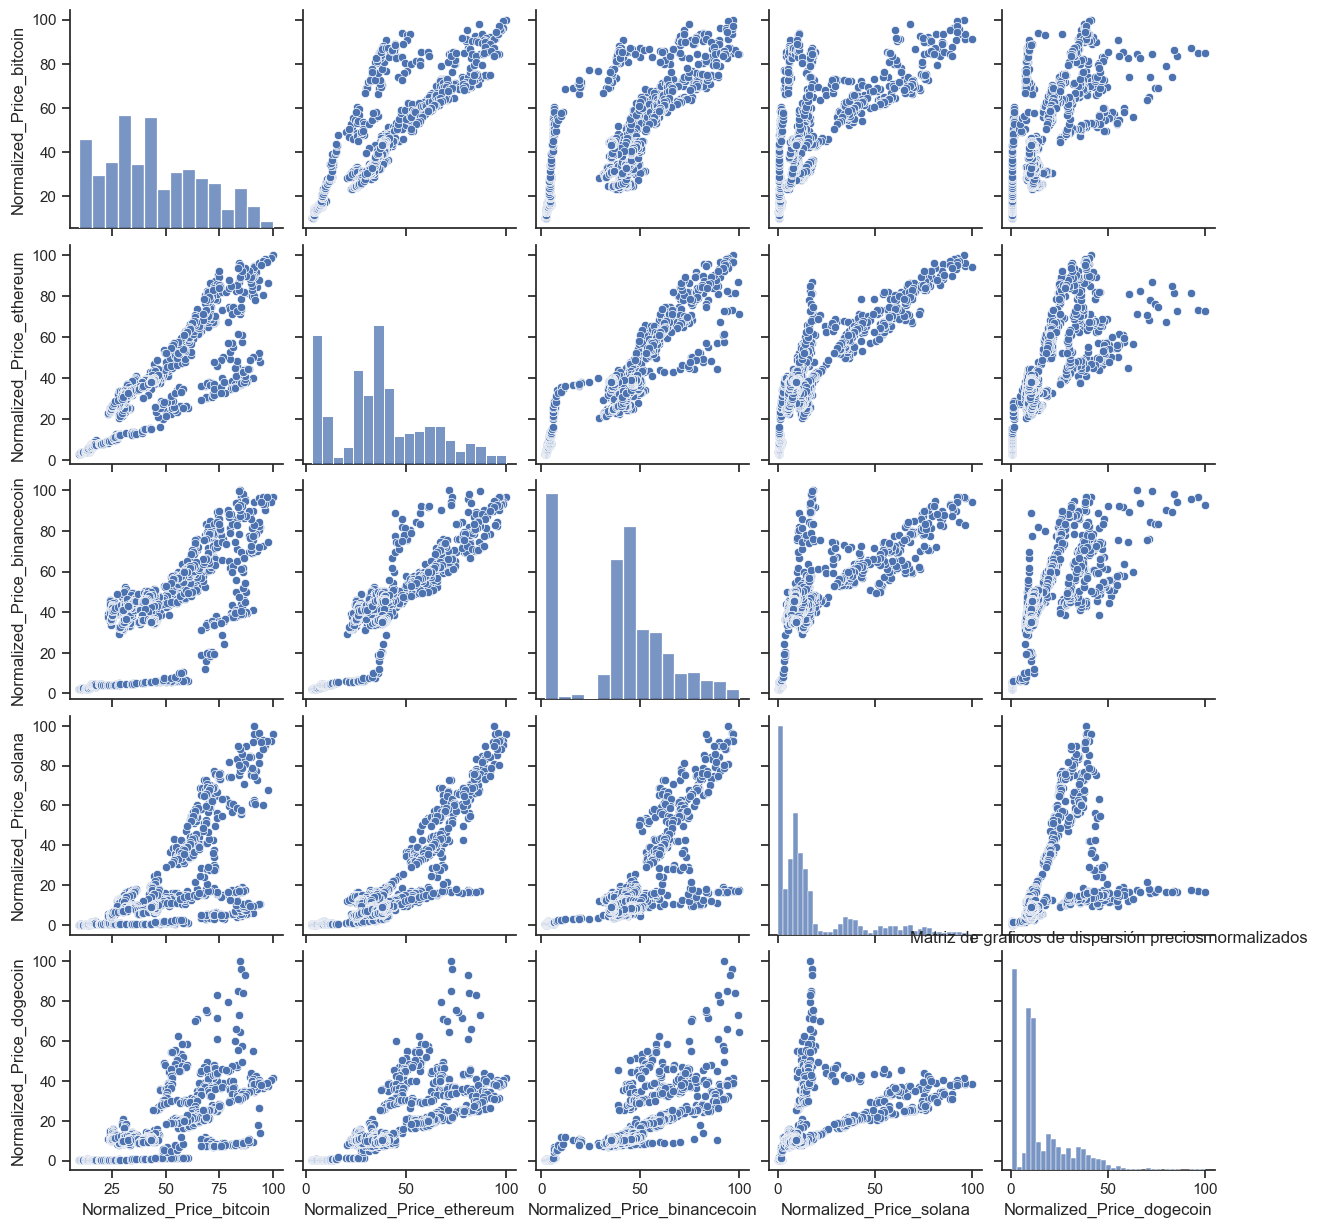

In [35]:
sns.set_theme(style='ticks')
sns.pairplot(l1price)
plt.title("Matriz de graficos de dispersión precios normalizados")

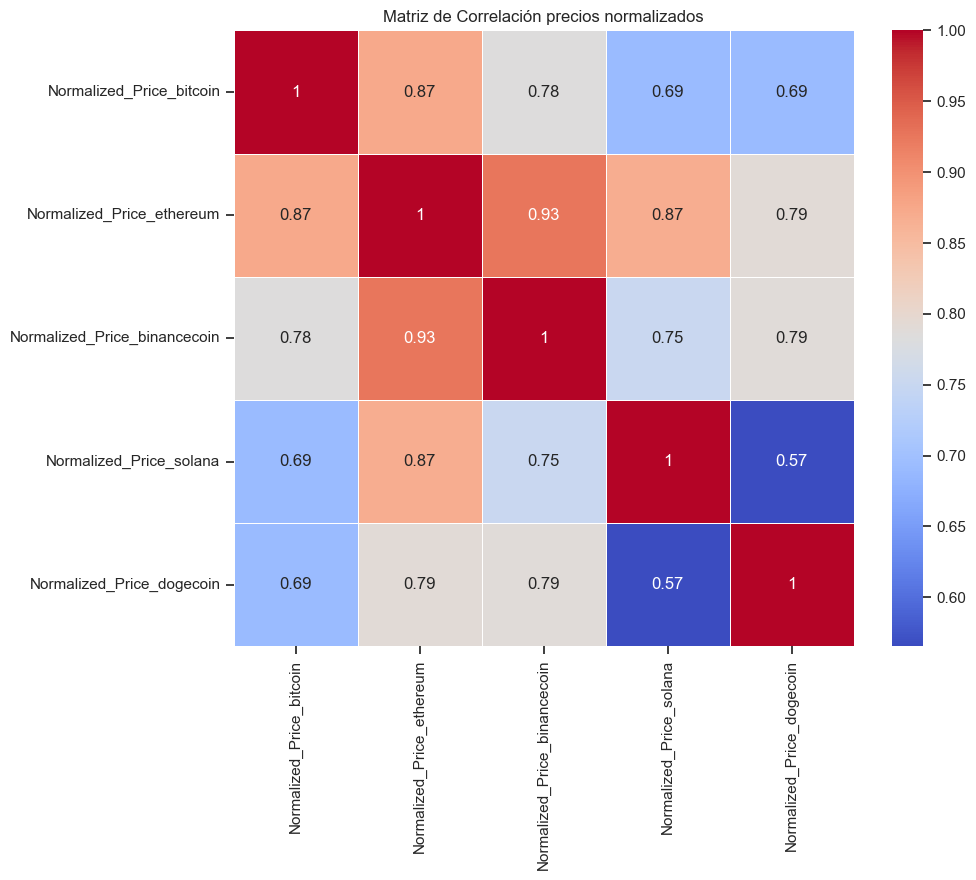

In [36]:
l1price = l1price.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(l1price, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación precios normalizados")
plt.show()

In [93]:
l1vol = layer_1[['total_volumes_bitcoin', 'total_volumes_ethereum', 'total_volumes_binancecoin', 'total_volumes_solana', 'total_volumes_dogecoin']]
l1vol2 = layer_1[['Volume_normalized_bitcoin', 'Volume_normalized_ethereum', 'Volume_normalized_binancecoin', 'Volume_normalized_solana', 'Volume_normalized_dogecoin' ]]
l1vol.dropna(inplace=True)
l1vol2.dropna(inplace=True)


C:\Users\Nahuel Elias\AppData\Local\Temp\ipykernel_22484\1000362941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l1vol.dropna(inplace=True)
C:\Users\Nahuel Elias\AppData\Local\Temp\ipykernel_22484\1000362941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l1vol2.dropna(inplace=True)


c:\Users\Nahuel Elias\Documents\Hernry\PI2\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Matriz de dispersion de volumenes operados')

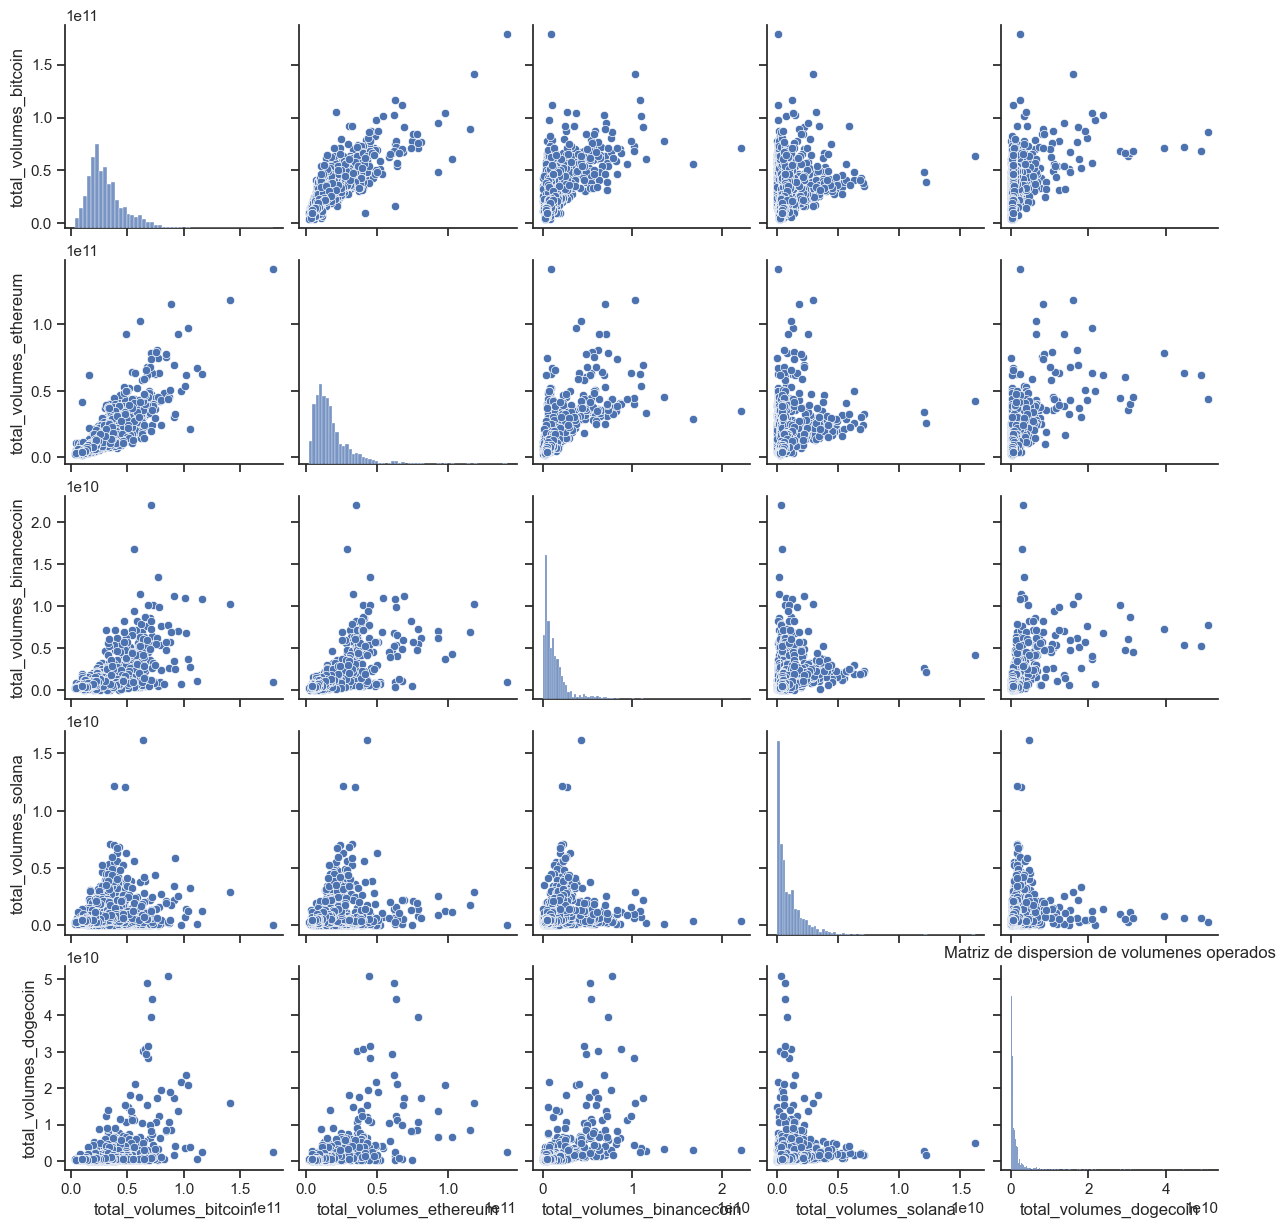

In [39]:

sns.set_theme(style='ticks')
sns.pairplot(l1vol)
plt.title("Matriz de dispersion de volumenes operados")

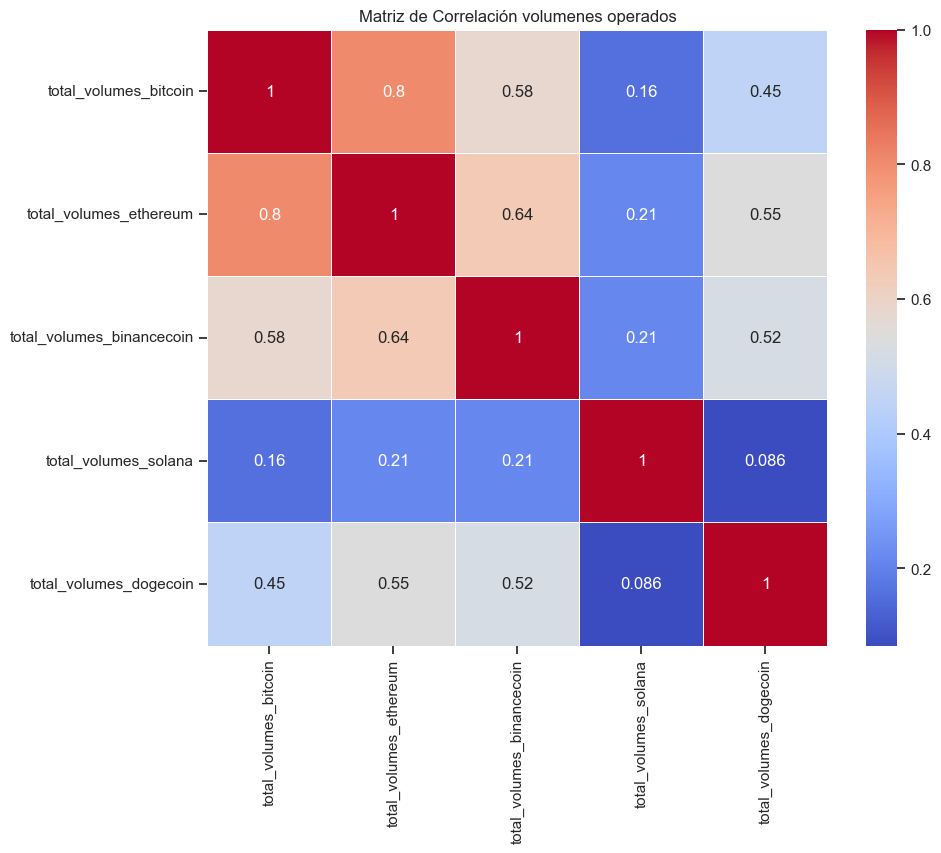

In [40]:
l1vol = l1vol.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(l1vol, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación volumenes operados")
plt.show()

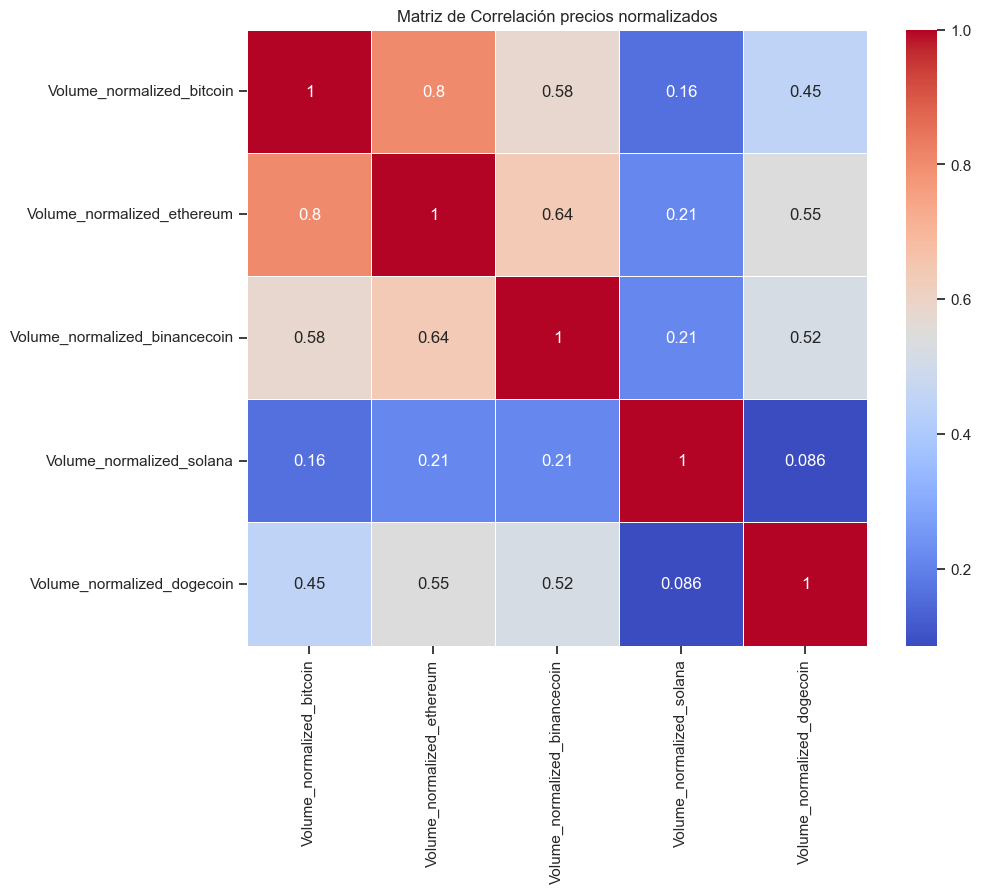

In [41]:
l1vol2 = l1vol2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(l1vol2, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación precios normalizados")
plt.show()

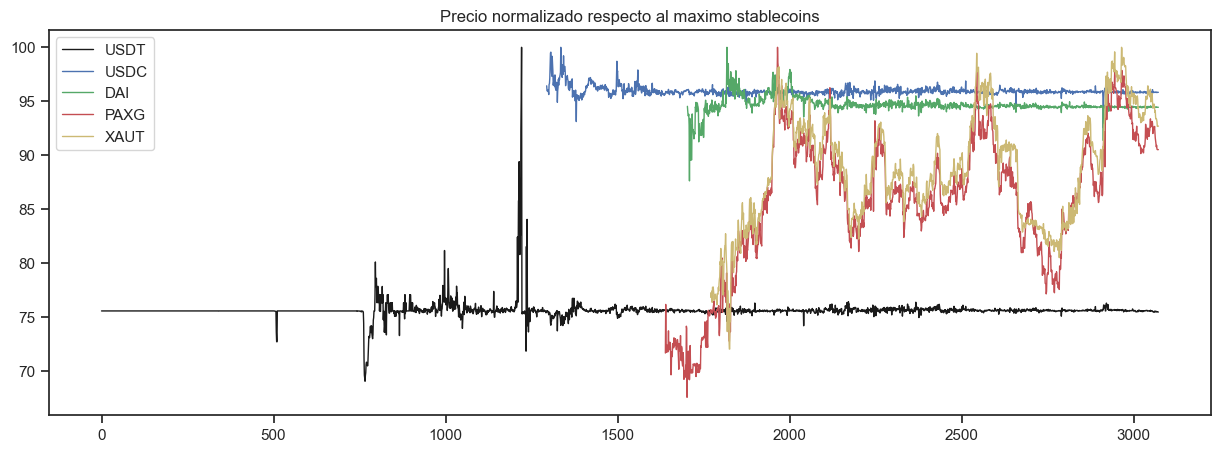

In [43]:
plt.figure(figsize=[15,5])


plt.title('Precio normalizado respecto al maximo stablecoins')
plt.plot(stablecoins['Normalized_Price_tether'], label= 'USDT', linewidth=1, color= 'k')
plt.plot(stablecoins['Normalized_Price_usd-coin'], label='USDC', linewidth=1, color= 'b')
plt.plot(stablecoins['Normalized_Price_dai'], label= 'DAI', linewidth=1, color= 'g')
plt.plot(stablecoins['Normalized_Price_pax-gold'], label= 'PAXG', linewidth=1, color= 'r')
plt.plot(stablecoins['Normalized_Price_tether-gold'], label= 'XAUT', linewidth=1, color= 'y')
plt.legend()

### Conclusion:

Se observa mayor variacion en las monedas USDT, USDC, y DAI al comienzo de vida de cada moneda.
Ademas se ve inestabilidad respecto al dolar de las monedas PAXG y XAUT, como era de esperarse ya que estan respaldadas en ORO.


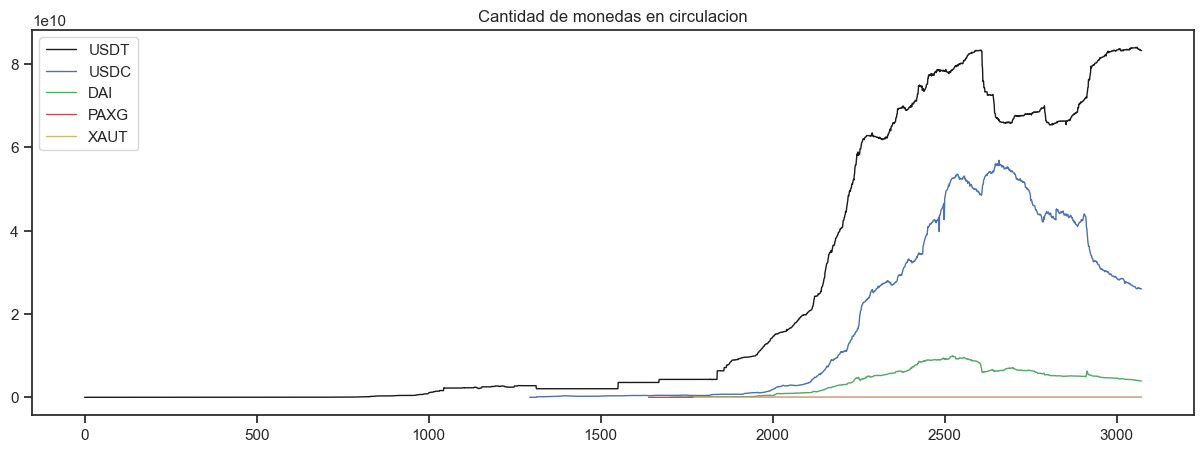

In [45]:
plt.figure(figsize=[15,5])


plt.title('Cantidad de monedas en circulacion')
plt.plot(stablecoins['n_coins_tether'], label= 'USDT', linewidth=1, color= 'k')
plt.plot(stablecoins['n_coins_usd-coin'], label='USDC', linewidth=1, color= 'b')
plt.plot(stablecoins['n_coins_dai'], label= 'DAI', linewidth=1, color= 'g')
plt.plot(stablecoins['n_coins_pax-gold'], label= 'PAXG', linewidth=1, color= 'r')
plt.plot(stablecoins['n_coins_tether-gold'], label= 'XAUT', linewidth=1, color= 'y')
plt.legend()

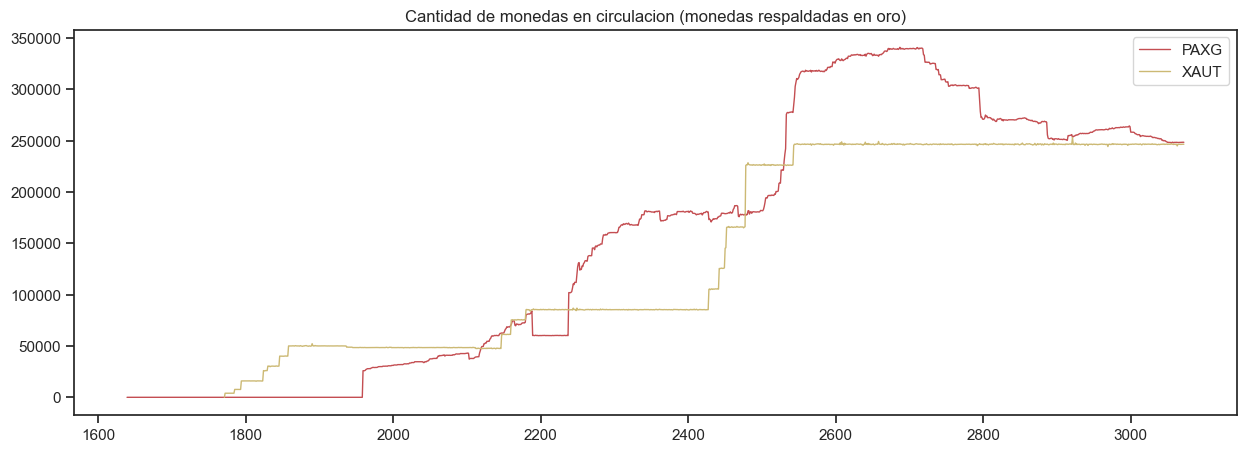

In [49]:
plt.figure(figsize=[15,5])


plt.title('Cantidad de monedas en circulacion (monedas respaldadas en oro)')
#plt.plot(stablecoins['n_coins_tether'], label= 'USDT', linewidth=1, color= 'k')
#plt.plot(stablecoins['n_coins_usd-coin'], label='USDC', linewidth=1, color= 'b')
#plt.plot(stablecoins['n_coins_dai'], label= 'DAI', linewidth=1, color= 'g')
plt.plot(stablecoins['n_coins_pax-gold'], label= 'PAXG', linewidth=1, color= 'r')
plt.plot(stablecoins['n_coins_tether-gold'], label= 'XAUT', linewidth=1, color= 'y')
plt.legend()

In [47]:
stablecoins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                3073 non-null   object 
 1   Price_tether                        3073 non-null   float64
 2   Normalized_Price_tether             3073 non-null   float64
 3   market_caps_tether                  3073 non-null   float64
 4   market_caps_normalized_tether       3073 non-null   float64
 5   n_coins_tether                      3073 non-null   float64
 6   total_volumes_tether                3073 non-null   float64
 7   Volume_normalized_tether            3073 non-null   float64
 8   Price_usd-coin                      1779 non-null   float64
 9   Normalized_Price_usd-coin           1779 non-null   float64
 10  market_caps_usd-coin                1779 non-null   float64
 11  market_caps_normalized_usd-coin     1779 no

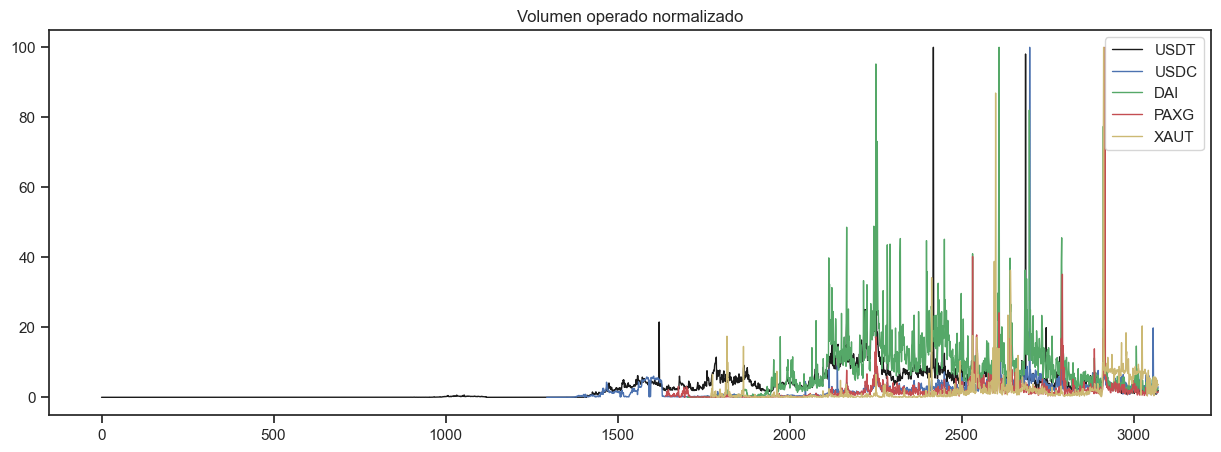

In [48]:
plt.figure(figsize=[15,5])


plt.title('Volumen operado normalizado')
plt.plot(stablecoins['Volume_normalized_tether'], label= 'USDT', linewidth=1, color= 'k')
plt.plot(stablecoins['Volume_normalized_usd-coin'], label='USDC', linewidth=1, color= 'b')
plt.plot(stablecoins['Volume_normalized_dai'], label= 'DAI', linewidth=1, color= 'g')
plt.plot(stablecoins['Volume_normalized_pax-gold'], label= 'PAXG', linewidth=1, color= 'r')
plt.plot(stablecoins['Volume_normalized_tether-gold'], label= 'XAUT', linewidth=1, color= 'y')
plt.legend()

In [61]:
layer_1_ohlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  982 non-null    object 
 1   Open_bitcoin                          982 non-null    float64
 2   High_bitcoin                          982 non-null    float64
 3   Low_bitcoin                           982 non-null    float64
 4   Close_bitcoin                         982 non-null    float64
 5   O_C_variation_Normalized_bitcoin      982 non-null    float64
 6   Max_Variation_Normalized_bitcoin      982 non-null    float64
 7   Open_ethereum                         766 non-null    float64
 8   High_ethereum                         766 non-null    float64
 9   Low_ethereum                          766 non-null    float64
 10  Close_ethereum                        766 non-null    float64
 11  O_C_variation_Norma

In [ ]:
layer_1_ohlc

En el siguiente grafico se ve la maxima variacion diaria dividido la media del precio en la ventana de tiempo dada (en este caso la aplicacion da una granuladidad de 4 dias)


$$
Max Variation Normalized = \frac{max-min}{open}*100
$$




Donde:
$$
\text{max: maximo precio del intervalo de tiempo (4 dias)}
$$

$$
\text{open: precio apertura del intervalo (4 dias)}
$$

(array([10., 51., 93., 62., 68., 66., 59., 50., 47., 43., 38., 30., 30.,
        23., 21., 28., 14., 13., 12.,  5.,  8., 12., 11.,  9.,  8.,  5.,
         7.,  6., 10.,  4.,  4.,  5.,  7.,  5.,  2.,  5.,  3.,  1.,  1.,
         1.,  1.,  4.,  0.,  3.,  2.,  2.,  2.,  0.,  1.,  1.]),
 array([ 0.        ,  0.69874613,  1.39749226,  2.09623838,  2.79498451,
         3.49373064,  4.19247677,  4.8912229 ,  5.58996902,  6.28871515,
         6.98746128,  7.68620741,  8.38495354,  9.08369966,  9.78244579,
        10.48119192, 11.17993805, 11.87868418, 12.5774303 , 13.27617643,
        13.97492256, 14.67366869, 15.37241482, 16.07116094, 16.76990707,
        17.4686532 , 18.16739933, 18.86614546, 19.56489158, 20.26363771,
        20.96238384, 21.66112997, 22.3598761 , 23.05862222, 23.75736835,
        24.45611448, 25.15486061, 25.85360674, 26.55235286, 27.25109899,
        27.94984512, 28.64859125, 29.34733738, 30.0460835 , 30.74482963,
        31.44357576, 32.14232189, 32.84106802, 33.53981414,

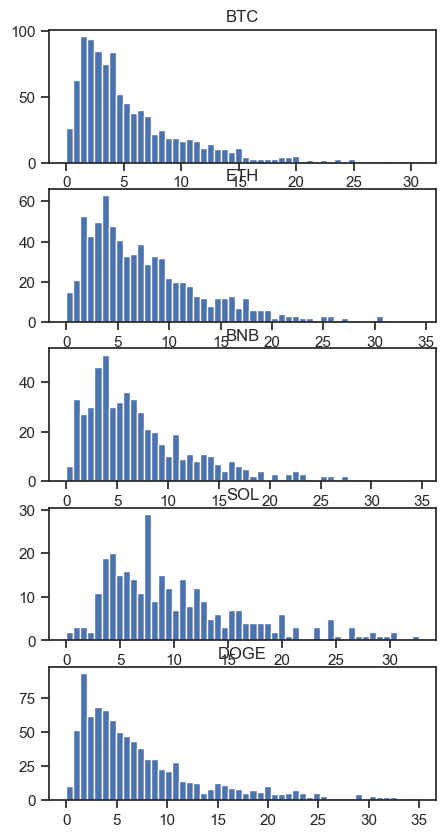

In [94]:
label='bitcooin'
tope=35
bins=50
fig, axs = plt.subplots(5,1, figsize=(5,10))
#plt.hist(df['price'], bins=100)
axs[0].set_title('BTC')
axs[0].hist(layer_1_ohlc['Max_Variation_Normalized_bitcoin'].loc[layer_1_ohlc['Max_Variation_Normalized_bitcoin']<tope] , bins=bins, color='b')
axs[1].set_title('ETH')
axs[1].hist(layer_1_ohlc['Max_Variation_Normalized_ethereum'].loc[layer_1_ohlc['Max_Variation_Normalized_ethereum']<tope], bins=bins)
axs[2].set_title('BNB')
axs[2].hist(layer_1_ohlc['Max_Variation_Normalized_binancecoin'].loc[layer_1_ohlc['Max_Variation_Normalized_binancecoin']<tope], bins=bins)
axs[3].set_title('SOL')
axs[3].hist(layer_1_ohlc['Max_Variation_Normalized_solana'].loc[layer_1_ohlc['Max_Variation_Normalized_solana']<tope], bins=bins)
axs[4].set_title('DOGE')
axs[4].hist(layer_1_ohlc['Max_Variation_Normalized_dogecoin'].loc[layer_1_ohlc['Max_Variation_Normalized_dogecoin']<tope], bins=bins)



In [95]:
layer_1_ohlc_variation = layer_1_ohlc[['Max_Variation_Normalized_bitcoin', 'Max_Variation_Normalized_ethereum', 'Max_Variation_Normalized_binancecoin', 'Max_Variation_Normalized_solana', 'Max_Variation_Normalized_dogecoin']]
layer_1_ohlc_variation.describe()




,Max_Variation_Normalized_bitcoin,Max_Variation_Normalized_ethereum,Max_Variation_Normalized_binancecoin,Max_Variation_Normalized_solana,Max_Variation_Normalized_dogecoin
count,982.000000,766.000000,564.000000,320.000000,922.000000
mean,5.789400,8.439729,13.774810,11.438043,9.830828
std,5.510090,7.800023,113.150457,9.134562,21.779372
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.184547,3.535525,3.456561,5.517715,2.930369
50%,4.120882,6.422824,6.047696,8.749136,5.652362
75%,7.432417,10.913396,10.545934,14.285714,10.495319
max,58.927476,89.589905,2681.235305,57.177652,536.658805


Conclusion:
De este conjunto de monedas con "precio variable", la que tiene menor variacion de precio en el intervalo de tiempo dado de 4 dias, es bitcoin, seguida por ethereum.